# Analysis and visualisation of Essex population and transport by ward
<br>
<b>Data must be obtain from different sources:</b>
<br>
- Ward boundaries (https://osdatahub.os.uk/downloads/open/BoundaryLine)
<br>
- Ward population (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/wardlevelmidyearpopulationestimatesexperimental)
<br>
- Train station localisation and usage (https://dataportal.orr.gov.uk/statistics/usage/estimates-of-station-usage)

<b>Sources that gave ideas:</b>
<br>
https://www.citypopulation.de/en/uk/eastofengland/
<br>
http://darribas.org/gds15/content/labs/lab_03.html
<br>

<b>Sources to double check the data consistency:</b>
<br>
https://en.wikipedia.org/wiki/Essex

## To do
- Statistical analysis of population by ward<br>
- Statistical analysis of ward boundaries<br>
- Statistical analysis of train station<br>


- Get area built as some ward are big to get better estimate of population localisation<br>


## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon # Required to use "overlay" https://gist.github.com/korakot/1cc3764602628dfdfcfe586305c31788
import Functions as fcn # custom functions

## Load datasets previously prepared and saved as pickle

In [2]:
boundariesPopulationEssex = pd.read_pickle("./01_Data/02_Preprocessed/boundariesPopulationEssex.pkl")
trainStationEssex = pd.read_pickle("./01_Data/02_Preprocessed/trainStationEssex.pkl")

## Analysis and visualisation

In [3]:
boundariesPopulationEssex['density'] = round(boundariesPopulationEssex['All Ages']/boundariesPopulationEssex['AREA_km2'],2)
boundariesPopulationEssex.head()

,FILE_NAME,AREA_CODE,DESCRIPTIO,CODE,HECTARES,geometry,AREA_km2,Ward Name 1,LA name (2019 boundaries),All Ages,density
0,ESSEX_COUNTY,DIW,District Ward,E05004070,3256.236,"POLYGON ((561084.097 197904.500, 561080.403 19...",32.56236,Brizes and Doddinghurst,Brentwood,6272.0,192.62
1,ESSEX_COUNTY,DIW,District Ward,E05004076,2795.113,"POLYGON ((561248.800 198814.899, 561242.699 19...",27.95113,"Ingatestone, Fryerning and Mountnessing",Brentwood,6260.0,223.96
2,ESSEX_COUNTY,DIW,District Ward,E05004081,1827.160,"POLYGON ((560409.997 187764.202, 560412.297 18...",18.27160,Warley,Brentwood,6399.0,350.22
3,ESSEX_COUNTY,DIW,District Ward,E05004071,1984.608,"POLYGON ((560409.997 187764.202, 560407.804 18...",19.84608,"Herongate, Ingrave and West Horndon",Brentwood,3696.0,186.23
4,ESSEX_COUNTY,DIW,District Ward,E05004078,683.749,"POLYGON ((561084.097 197904.500, 561101.296 19...",6.83749,Shenfield,Brentwood,5400.0,789.76


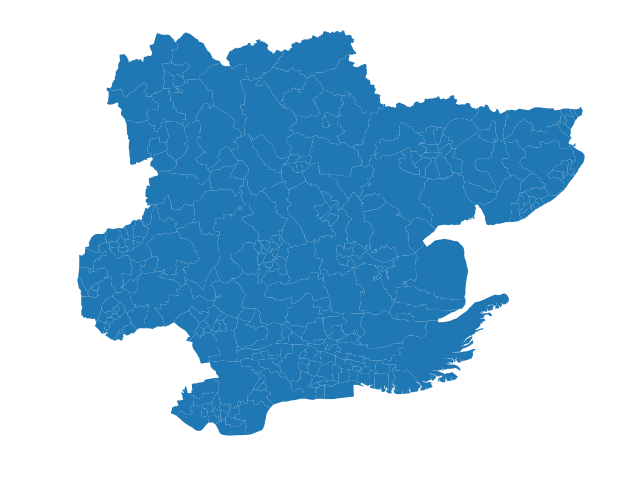

In [4]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax = boundariesPopulationEssex.plot(ax=ax)
ax.set_axis_off()

In [5]:
print('Total population Essex: ' + str(boundariesPopulationEssex['All Ages'].sum()))
print('Total area Essex [km2]: ' + str(round(boundariesPopulationEssex['AREA_km2'].sum(),2)))
print('Total population density Essex [/km2]: ' + str(round(boundariesPopulationEssex['All Ages'].sum()/boundariesPopulationEssex['AREA_km2'].sum(),2)))
print('Due to the need to project the earth to a 2D plane, the area calculated might differ a bit from the measured area (3,670 km2, https://en.wikipedia.org/wiki/Essex).')

Total population Essex: 1846655.0
Total area Essex [km2]: 3948.91
Total population density Essex [/km2]: 467.64
Due to the need to project the earth to a 2D plane, the area calculated might differ a bit from the measured area (3,670 km2, https://en.wikipedia.org/wiki/Essex).


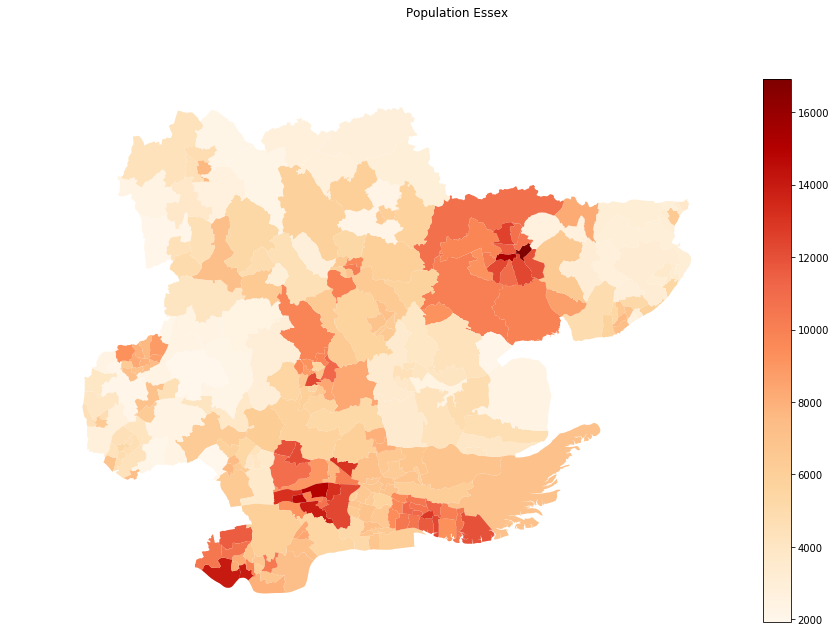

In [6]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
ax.set_axis_off()
fig.suptitle('Population Essex')
plt.show()

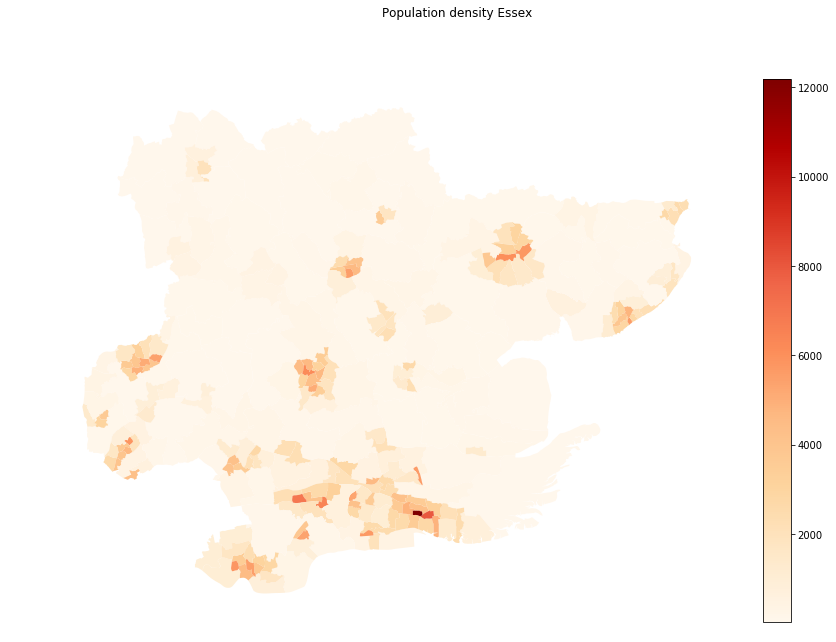

In [7]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssex.plot(ax=ax,column='density', cmap='OrRd',legend=True)
ax.set_axis_off()
fig.suptitle('Population density Essex')
plt.show()

In [8]:
# Train station

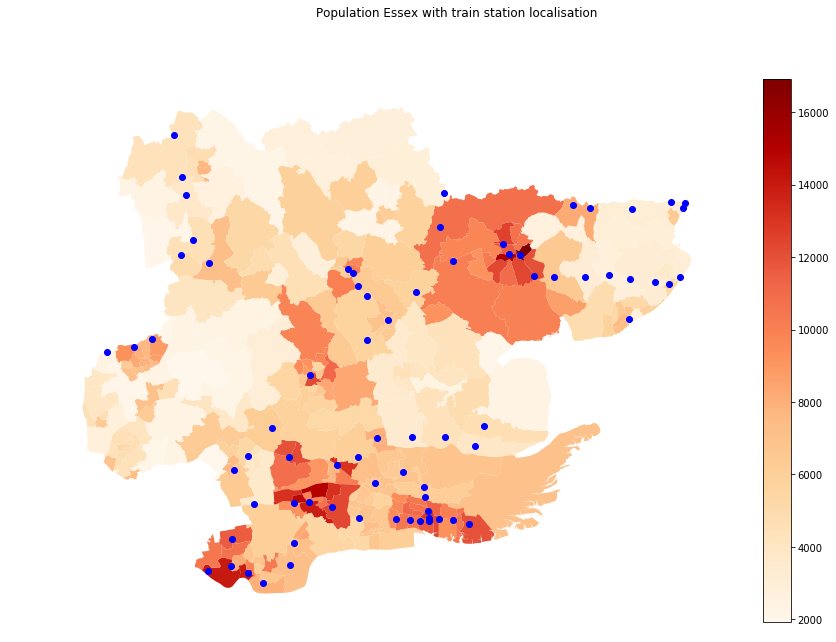

In [9]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
trainStationEssex.plot(ax=ax, color='blue')
ax.set_axis_off()
fig.suptitle('Population Essex with train station localisation')
plt.show()

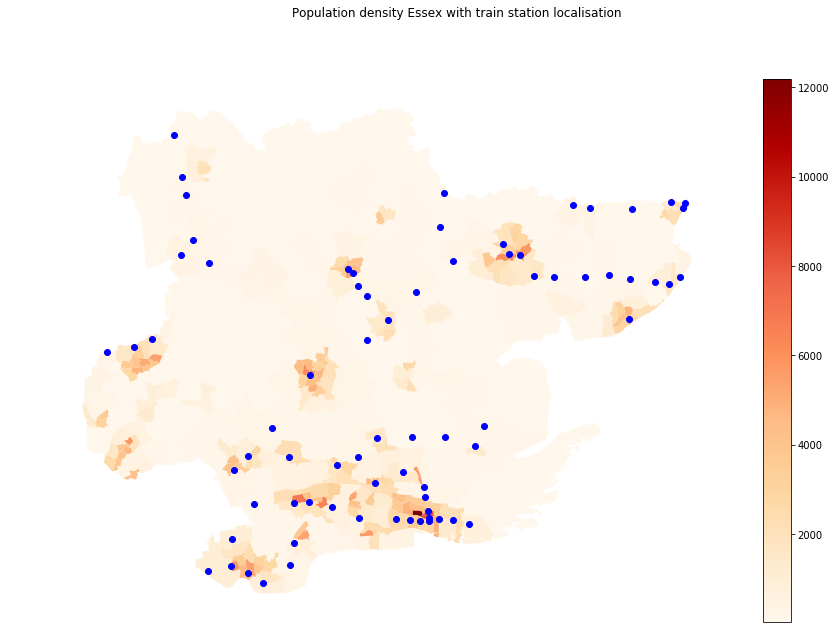

In [10]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssex.plot(ax=ax,column='density', cmap='OrRd',legend=True)
trainStationEssex.plot(ax=ax, color='blue')
ax.set_axis_off()
fig.suptitle('Population density Essex with train station localisation')
plt.show()

In [11]:
# Add buffer of 2 miles around station

In [12]:
circleRadius = 1609.344 # in meters
bufferStation = trainStationEssex.geometry.buffer(circleRadius)
bufferUnion = bufferStation.geometry.unary_union # Combine all the buffer circle
bufferUnion_gdf = gpd.GeoDataFrame(pd.DataFrame(data = {'geometry': bufferUnion}), crs="epsg:27700")

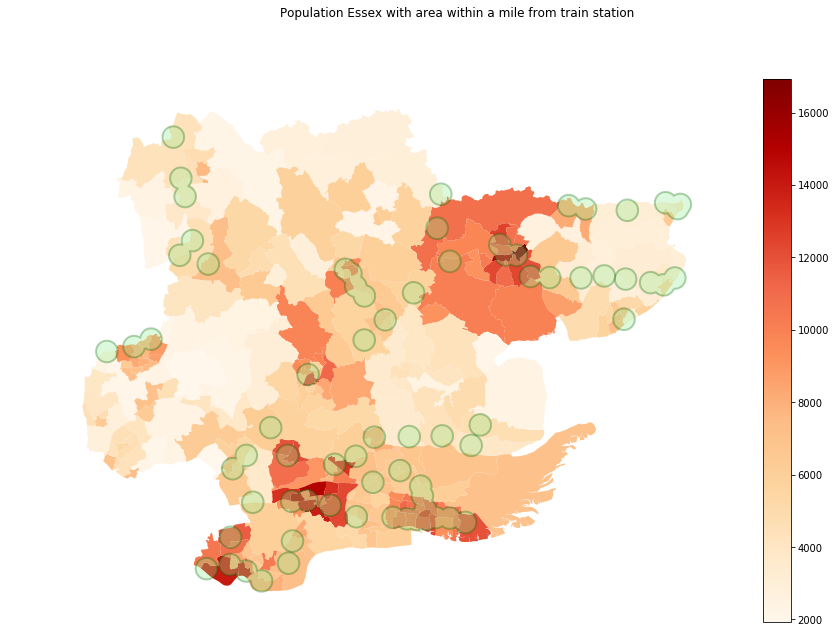

In [13]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssex.plot(ax=ax,column='All Ages', cmap='OrRd',legend=True)
bufferUnion_gdf.plot(color="lightgreen", alpha = 0.3, edgecolor = "darkgreen", linewidth = 2,ax=ax)
ax.set_axis_off()
fig.suptitle('Population Essex with area within a mile from train station')
plt.show()

In [29]:
areaEssex = round(boundariesPopulationEssex['AREA_km2'].sum(),2)
areaEssex

3948.91

In [46]:
intersectionQuartierBuffer_gdf = gpd.overlay(boundariesPopulationEssex[['geometry','All Ages','density','AREA_km2']], bufferUnion_gdf, how='intersection') 

In [47]:
intersectionQuartierBuffer_gdf.head()

,All Ages,density,AREA_km2,geometry
0,6260.0,223.96,27.95113,"POLYGON ((566576.837 199368.300, 566576.404 19..."
1,5837.0,126.24,46.23825,"MULTIPOLYGON (((566037.288 197952.076, 566049...."
2,6399.0,350.22,18.27160,"POLYGON ((557775.540 192566.193, 557806.603 19..."
3,5400.0,789.76,6.83749,"POLYGON ((562328.048 196297.122, 562182.603 19..."
4,1920.0,160.78,11.94201,"MULTIPOLYGON (((558390.846 194350.834, 558347...."


In [49]:
intersectionQuartierBuffer_gdf['geometry'][0].area/10**6

7.899349411920366

In [41]:
intersectionQuartierBuffer_gdf['All Ages'].sum()

1716317.0

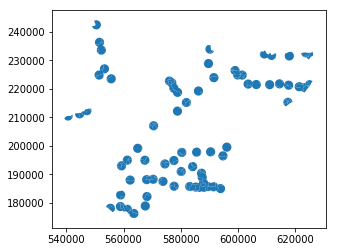

In [34]:
intersectionQuartierBuffer_gdf.plot()

In [ ]:
# Calculate area of city and buffer around metro
areaRennes = round(quartierRennes_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)
print('Surface de Rennes: ' + str(areaRennes) + 'km2') # Search for the correct projection code https://spatialreference.org/ref/epsg/?search=france&srtext=Search
print('Zone a moins de 500m du metro: ' + str(round(bufferUnion_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)) + 'km2')

# Get the polygon where "quartier" and buffer intersect  https://geopandas.org/set_operations.html
intersectionQuartierBuffer_gdf = gpd.overlay(quartierRennes_gdf[['geometry']], bufferUnion_gdf, how='intersection') 
# Calculate area of Rennes covered by buffer
areaBuffer = round(intersectionQuartierBuffer_gdf.geometry.to_crs(epsg=2192).area.sum()/10**6,2)
print('Surface de Rennes à 500m du métro: ' + str(areaBuffer) + 'km2 (' + str(round(areaBuffer/areaRennes*100,2)) + '%)')

## AOB at region level

In [ ]:
data = gpd.read_file("./01_Data/bdline_gpkg_gb/Data/GB/district_borough_unitary_region.shp",rows=20)
data.head()

In [ ]:
data = gpd.read_file("./01_Data/bdline_gpkg_gb/Data/GB/district_borough_unitary_region.shp")
data.head()

In [ ]:
dataFiltered = data[data['FILE_NAME'] == 'ESSEX_COUNTY']

In [ ]:
dataFiltered.plot(figsize=(10,10))

# AOB previous work

In [ ]:
nbColor = 10
custom_colors = fcn.linear_gradient("#FACBC1","#E34F2F",nbColor)['hex']
dataframeColumn = 'All Ages'

In [ ]:
def polyColor(val):
    if val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.1):
        color = custom_colors[0]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.2):
        color = custom_colors[1]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.3):
        color = custom_colors[2]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.4):
        color = custom_colors[3]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.5):
        color = custom_colors[4]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.6):
        color = custom_colors[5]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.7):
        color = custom_colors[6]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.8):
        color = custom_colors[7]
    elif val < boundariesPopulationEssexPKL[dataframeColumn].quantile(0.9):
        color = custom_colors[8]
    elif val >= boundariesPopulationEssexPKL[dataframeColumn].quantile(0.9):
        color = custom_colors[9]
    return color

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax = boundariesPopulationEssexPKL.plot(ax=ax, color = [polyColor(boundariesPopulationEssexPKL['All Ages'][x]) for x in range(0,len(boundariesPopulationEssexPKL))])
ax.set_axis_off()
fig.suptitle('Population Essex')
plt.show()